In [51]:
import nibabel as nib
from skimage.metrics import structural_similarity as ssim
import numpy as np
import random
import matplotlib.pyplot as plt
import os

train_path = "Dataset/train"
test_path = "Dataset/test"

In [55]:
# Get a list of MRI images for training
train_mri_images = [os.path.abspath(path) for path in glob.glob(f'{train_path}/MRI/*.nii')]

# Get a list of ultrasound images for training
train_ultrasound_images = [os.path.abspath(path) for path in glob.glob(f'{train_path}/US/*.nii')]

# Get a list of MRI images for testing
test_mri_images = [os.path.abspath(path) for path in glob.glob(f'{test_path}/MRI/*.nii')]

# Get a list of ultrasound images for testing
test_ultrasound_images = [os.path.abspath(path) for path in glob.glob(f'{test_path}/US/*.nii')]


print("Number of MRI images for training:", len(train_mri_images))
print("Number of ultrasound images for training:", len(train_ultrasound_images))
print("Number of MRI images for testing:", len(test_mri_images))
print("Number of ultrasound images for testing:", len(test_ultrasound_images))

Number of MRI images for training: 20
Number of ultrasound images for training: 20
Number of MRI images for testing: 4
Number of ultrasound images for testing: 4


In [52]:
import SimpleITK as sitk
import numpy as np
import os
import glob

# Create an empty list to store the numpy arrays
train_mri_arrays = []

# Loop through each image path, read the image, and append the numpy array to the list
for image_path in train_mri_images:
    sitk_image = sitk.ReadImage(image_path)
    np_image = sitk.GetArrayFromImage(sitk_image)
    train_mri_arrays.append(np_image)

train_ultrasound_arrays = []

# Loop through each image path, read the image, and append the numpy array to the list
for image_path in train_ultrasound_images:
    sitk_image = sitk.ReadImage(image_path)
    np_image = sitk.GetArrayFromImage(sitk_image)
    train_ultrasound_arrays.append(np_image)
    

In [57]:
for i, np_image in enumerate(train_mri_arrays):
    print(f"Shape of MRI image {i}: {np_image.shape}", str(train_mri_images[i]))

Shape of MRI image 0: (138, 157, 175) E:\BrainVoxGen\Dataset\train\MRI\cropped_MRI1.nii
Shape of MRI image 1: (202, 178, 176) E:\BrainVoxGen\Dataset\train\MRI\cropped_MRI10.nii
Shape of MRI image 2: (181, 188, 185) E:\BrainVoxGen\Dataset\train\MRI\cropped_MRI11.nii
Shape of MRI image 3: (206, 165, 186) E:\BrainVoxGen\Dataset\train\MRI\cropped_MRI12.nii
Shape of MRI image 4: (172, 207, 177) E:\BrainVoxGen\Dataset\train\MRI\cropped_MRI13.nii
Shape of MRI image 5: (157, 191, 127) E:\BrainVoxGen\Dataset\train\MRI\cropped_MRI14.nii
Shape of MRI image 6: (179, 214, 164) E:\BrainVoxGen\Dataset\train\MRI\cropped_MRI15.nii
Shape of MRI image 7: (157, 213, 188) E:\BrainVoxGen\Dataset\train\MRI\cropped_MRI16.nii
Shape of MRI image 8: (187, 165, 204) E:\BrainVoxGen\Dataset\train\MRI\cropped_MRI17.nii
Shape of MRI image 9: (162, 213, 182) E:\BrainVoxGen\Dataset\train\MRI\cropped_MRI18.nii
Shape of MRI image 10: (27, 22, 21) E:\BrainVoxGen\Dataset\train\MRI\Cropped_MRI19.nii
Shape of MRI image 11: (

In [37]:
import numpy as np
from scipy import ndimage

# Set the target dimensions
x_dim = 128
y_dim = 128
z_dim = 128

resized_train_mri_images = np.zeros((len(train_mri_arrays), x_dim, y_dim, z_dim))
resized_train_ultrasound_images = np.zeros((len(train_ultrasound_arrays), x_dim, y_dim, z_dim))

# Resize all the training images to the same shape
for i, img in enumerate(train_mri_arrays):
    resized_train_mri_images[i] = ndimage.zoom(img, (x_dim/img.shape[0], y_dim/img.shape[1], z_dim/img.shape[2]), order=1)
for i, img in enumerate(train_ultrasound_arrays):
    resized_train_ultrasound_images[i] = ndimage.zoom(img, (x_dim/img.shape[0], y_dim/img.shape[1], z_dim/img.shape[2]), order=1)

# Print the shapes of the resized training images to confirm they all have the same shape
print(resized_train_mri_images.shape)
print(resized_train_ultrasound_images.shape)

# Update original training arrays with resized arrays
train_mri_arrays = resized_train_mri_images
train_ultrasound_arrays = resized_train_ultrasound_images

# Free memory of resized arrays
del resized_train_mri_images
del resized_train_ultrasound_images

(20, 128, 128, 128)
(20, 128, 128, 128)


In [38]:
def random_crop(input_image, real_image):
    stacked_image = tf.stack([input_image, real_image], axis=0)
    cropped_image = tf.image.random_crop(stacked_image, size=[2,IMG_HEIGHT, IMG_WIDTH, IMG_LENGTH])
    return np.array(cropped_image[0]), np.array(cropped_image[1])

In [42]:
# outputs the average ssim of all 3d images
output_path = "Dataset/train/MRI/"
test_path = "Dataset/train/US/"

# Loop over each image in the test and output files
for i in range(len(train_mri_arrays)):
    # Load the images from file
    #output_img = nib.load(os.path.join(output_path, f"Cropped_MRI{i+1}.nii")).get_fdata()
    #test_img = nib.load(os.path.join(test_path, f"Cropped_US{i+1}.nii")).get_fdata()
    
    output_img, test_img = random_crop(train_mri_arrays[i], train_ultrasound_arrays[i])

    ssim_scores = []
    
    # Loop over each slice in the 3D images
    for j in range(output_img.shape[2]):
        # Select a slice from each image
        slice1 = output_img[:, :, j]
        slice2 = test_img[:, :, j]
        
        # Calculate the SSIM score for the current slice
        score = ssim(slice1, slice2, data_range=slice2.max() - slice2.min())
        
        # Add the SSIM score to the list
        ssim_scores.append(score)
    
    # Calculate the average SSIM score across all slices
    avg_ssim = np.mean(ssim_scores)
    
    print(f'Average SSIM score for image {i+1}: {avg_ssim:.4f}')

Average SSIM score for image 1: 0.2047
Average SSIM score for image 2: 0.1693
Average SSIM score for image 3: 0.1438
Average SSIM score for image 4: 0.0814
Average SSIM score for image 5: 0.0781
Average SSIM score for image 6: 0.1798
Average SSIM score for image 7: 0.1247
Average SSIM score for image 8: 0.1405
Average SSIM score for image 9: 0.1283
Average SSIM score for image 10: 0.0984
Average SSIM score for image 11: 0.1745
Average SSIM score for image 12: 0.1591
Average SSIM score for image 13: 0.1643
Average SSIM score for image 14: 0.1617
Average SSIM score for image 15: 0.1556
Average SSIM score for image 16: 0.1711
Average SSIM score for image 17: 0.1744
Average SSIM score for image 18: 0.1619
Average SSIM score for image 19: 0.1732
Average SSIM score for image 20: 0.0688


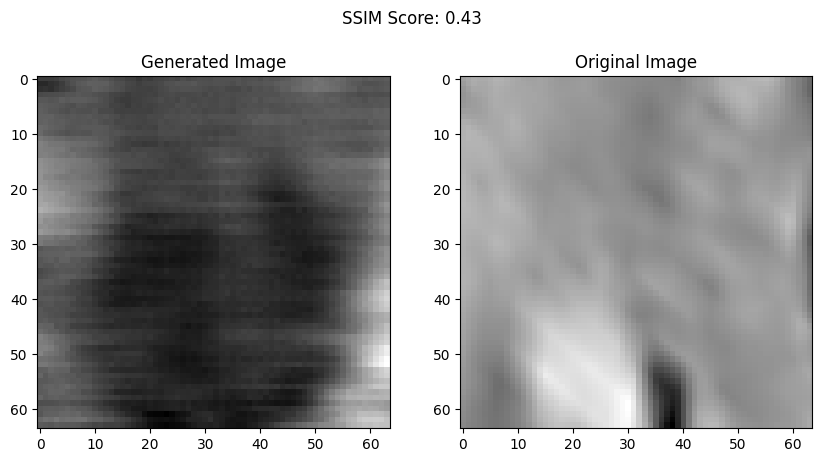

In [40]:
# outputd the slices with max ssim score
image1 = nib.load('Output/7.nii').get_fdata()
image2 = nib.load('Test/7.nii').get_fdata()

# Initialize variables
max_score = -1
max_slice1 = None
max_slice2 = None

# Loop over each slice in the 3D images
for z in range(image1.shape[0]):
    # Extract the 2D slices from both images
    slice1 = image1[z, :, :]
    slice2 = image2[z, :, :]

    # Compute the SSIM score
    score = ssim(slice1, slice2, data_range=slice2.max() - slice2.min())

    # Check if the current score is the maximum so far
    if score > max_score:
        max_score = score
        max_slice1 = slice1
        max_slice2 = slice2

# Plot the two slices with the maximum SSIM score
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))
ax1.imshow(max_slice1, cmap='gray')
ax1.set_title('Generated Image')
ax2.imshow(max_slice2, cmap='gray')
ax2.set_title('Original Image')
fig.suptitle('SSIM Score: {:.2f}'.format(max_score))

# Show the plot
plt.show()